File created by Jinghao Chen (jinghc2@uci.edu).

Note: "paper" in the following conext refers to Kinney et al. 2010 https://www.pnas.org/doi/10.1073/pnas.1004290107.

Dataset "SRR039136.fasta" can be downloaded from NCBI https://www.ncbi.nlm.nih.gov/sra/SRX018658.

In [1]:
f=open('data/SRR039136.fasta','r')
lines=f.readlines()

Read the first 5 data points from the dataset.

In [2]:
lines[:10]

['@SRR039136.1.2 FUVUBMK01D4IUB length=258\n',
 'ACAGCATTAGGCGTATCACGAGGCCCTTTCGTCTTCACCTCGAGCACGACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTACGGCTGGTACGTTTTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCATGATTACGGATTCACTGGCCGTCGTTTTACAACGTCCTGAGCGGGCTGGC\n',
 '@SRR039136.2.2 FUVUBMK01DD801 length=280\n',
 'NGTCATTAGGCGTATCACGAGGCCCTTTCGTCTTCACCTCGAGCACGACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTNNNGTTGNTTNCTCATTAGNTACCCNCTTACGCGTTTACCTACCTTAACTTTNTCGTACCGGTTTCCGGTNTGGTTAAGTTGTTGGTAAGTTGGTGTAAATAGGTTNAACACGTTAGAAACCAATTCGAACNGACCGAATGCTAGNTCACTGCTCGTTNACGCCTTGACGTCCGGTTCAGGCCGAGCGG\n',
 '@SRR039136.3.2 FUVUBMK01EKQGF length=258\n',
 'ACGAGCTTAGGCGTATCACGAGGCCCTTTCGTCTTCACCTCGAGCACGACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAATGTGAGTTAACTCACTGATTAGGCACCCCAGGCTTTACACTTTAAGCTCCCGGCTCCTATGTTGTGTGCAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCATGATTACGGATTCACTGGCCGTCGTTTTACAACGTCCTGAGCGGGCTGGC\n',
 '@SRR039136.4.2 FUVUBMK01D9XCY length=254

The paper said there are 448,416 reads but there are actually 448,417 (1 more).

In [3]:
int(len(lines)/2)

448417

Initialize 10-mer on the left and right, and 7-mer barcodes.

In [4]:
ls = 'AGCGCAACGC'
rs = 'AATTGTGAGC'

In [5]:
barcodes = ['TCACGTG','ATGCTAT','AGATATG','ATATAGC','CTGACGA','AGCTGTA','AGTGATA','CATGACA','TGTATGC','TGTCAGT']

Now go with paper SI 1d: Processing of sequence reads

In [6]:
sqs = {}
[sqs.setdefault(i, []) for i in range(10)]

for i,line in enumerate(lines):
    li = line.find(ls)
    ri = line.find(rs)
    if i%2 and li+1 and ri+1 and ri-li == 85:
        s = line[li+10:ri]
        barcode = line[:7]
        if ('N' not in s) and (barcode in barcodes):
            sqs[barcodes.index(barcode)].append(s)

Check with table S4, should be 7,680, number matched.

In [7]:
print(len(sqs[0]))

7680


Now go with paper SI 1f. Post-sort loss of library diversity

In [8]:
for i,s in sqs.items():
    sqs[i] = list(set(s))

Check again, with table S4, should be 5,799, number matched.

In [9]:
print(len(sqs[0]))

5799


Check with table 1, it said there are 51,835, but there are actually 51,853. This should be a typo in the paper.

In [10]:
nums = [len(sqs[i]) for i in range(10)]
sum(nums)

51853

We can also check the distribution of each bin from the full-wt dataset.

In [11]:
import matplotlib.pyplot as plt

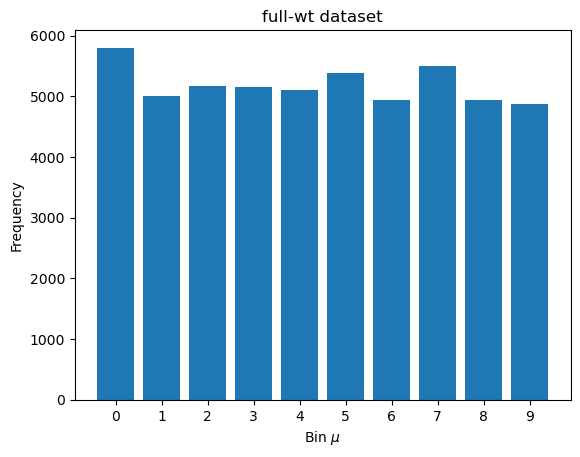

In [12]:
plt.bar(sqs.keys(),nums)
plt.xticks(range(10))
plt.xlabel('Bin $\mu$')
plt.ylabel('Frequency')
plt.title('full-wt dataset')
plt.show()

They are roughly evenly distributed.

Now store the dictionary "sqs" as a file "sqs.pkl" for future use.

In [13]:
import pickle

In [14]:
pickle_out = open("data/sqs.pkl","wb")
pickle.dump(sqs, pickle_out)
pickle_out.close()

We can further turn that sequence data into numpy type for future processing:

In [15]:
import numpy as np
import mptools.tools as tl # model parameterization tools

In [16]:
data_c = tl.seq2data(sqs,1,9,-74,-49) # CRP binding sites: [-74:-49]
data_r = tl.seq2data(sqs,1,9,-41,-1) # RNAP binding sites: [-41:-1]

In [17]:
data_comb = np.hstack((data_c[:,:-1],data_r))

Check the data we obtain.

In [18]:
Mc, Nc = data_c.shape
Mr, Nr = data_r.shape
M_comb, N_comb = data_comb.shape

In [19]:
Mc, Nc

(46054, 105)

In [20]:
Mr, Nr

(46054, 165)

In [21]:
M_comb, N_comb

(46054, 269)

In [22]:
pickle_out = open("data/data_c.pkl","wb")
pickle.dump(data_c, pickle_out)
pickle_out.close()

In [23]:
pickle_out = open("data/data_r.pkl","wb")
pickle.dump(data_r, pickle_out)
pickle_out.close()

In [24]:
pickle_out = open("data/data_comb.pkl","wb")
pickle.dump(data_comb, pickle_out)
pickle_out.close()